Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —

Кількість рядків та стовпців у датафреймі: (28, 9)

Типи всіх стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

Частка пропусків міститься в кожній колонці:
Регіон    100.000000
1950        7.142857
1960        3.571429
1970        3.571429
1990        0.000000
2000        0.000000
2012        0.000000
2014        7.142857
2019       14.285714
dtype: float64

Список регіонів з вищим рівнем народжуваності у 2019 році:
2    NaN
6  

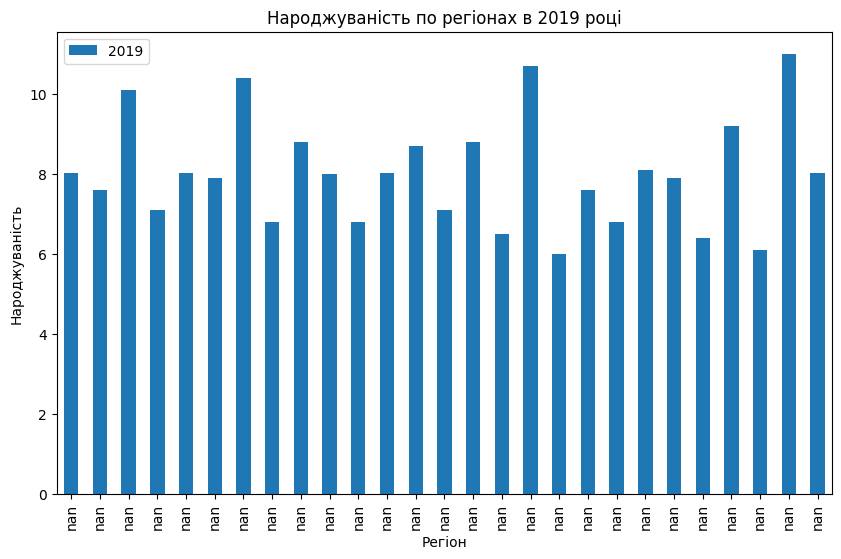

Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')


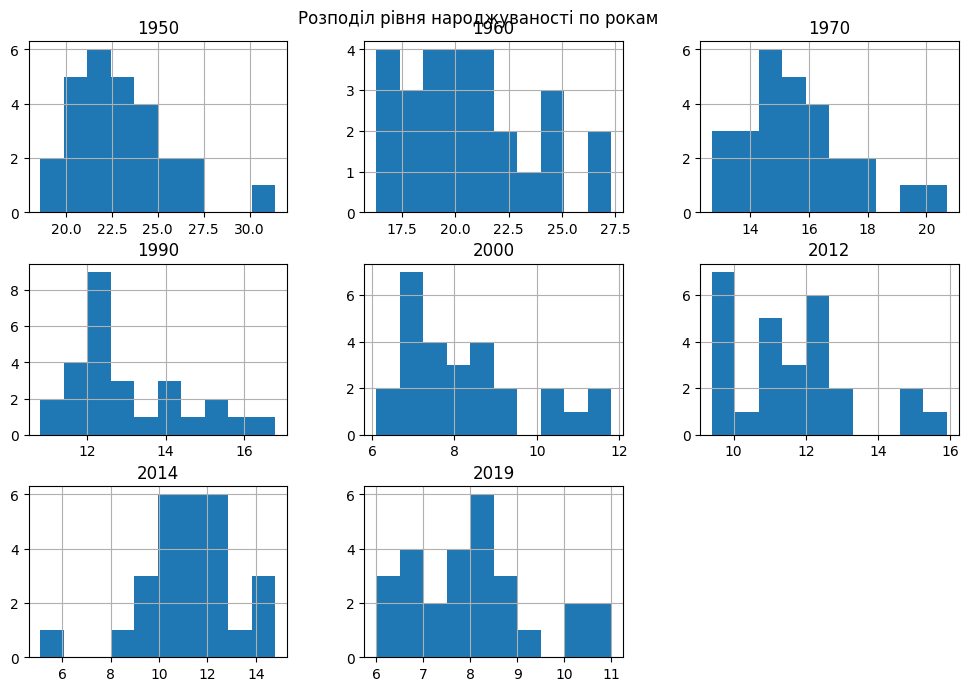

<Figure size 800x800 with 0 Axes>

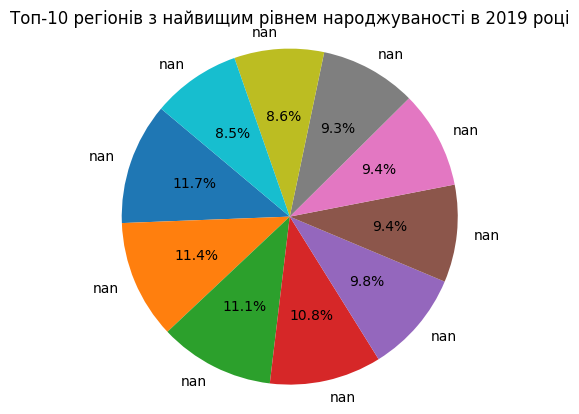

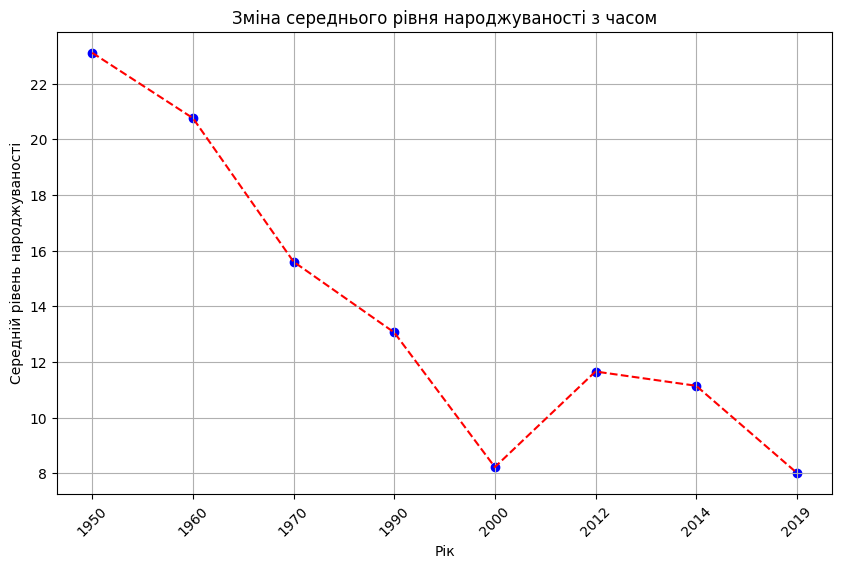

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

print("Перші рядки таблиці:")
print(df.head())

print("\nКількість рядків та стовпців у датафреймі:", df.shape)

df.replace("—", np.nan, inplace=True)

print("\nТипи всіх стовпців:")
print(df.dtypes)


non_numeric_columns = df.columns[df.dtypes == object]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nЧастка пропусків міститься в кожній колонці:")
print(missing_percentage)


df = df.drop(df.index[-1])


df.fillna(df.mean(), inplace=True)


higher_birth_rate_2019 = df[df['2019'] > df['2019'].mean()]
regions_higher_birth_rate_2019 = higher_birth_rate_2019['Регіон']
print("\nСписок регіонів з вищим рівнем народжуваності у 2019 році:")
print(regions_higher_birth_rate_2019)


max_birth_rate_2014_region = df.loc[df['2014'].idxmax()]['Регіон']
print("\nРегіон з найвищим рівнем народжуваності у 2014 році:", max_birth_rate_2014_region)


df.plot(kind='bar', x='Регіон', y='2019', figsize=(10, 6))
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)
plt.show()
print(df.columns)

df.drop(columns=['Регіон']).hist(figsize=(12, 8), bins=10)
plt.suptitle('Розподіл рівня народжуваності по рокам', y=0.92)
plt.show()

plt.figure(figsize=(8, 8))
df[['Регіон', '2019']].sort_values(by='2019', ascending=False).head(10).plot(kind='pie', y='2019', labels=df['Регіон'], autopct='%1.1f%%', startangle=140, legend=False)
plt.axis('equal')
plt.title('Топ-10 регіонів з найвищим рівнем народжуваності в 2019 році')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.columns[1:], df.iloc[:, 1:].mean(), color='blue')
plt.plot(df.columns[1:], df.iloc[:, 1:].mean(), linestyle='dashed', color='red')
plt.title('Зміна середнього рівня народжуваності з часом')
plt.xlabel('Рік')
plt.ylabel('Середній рівень народжуваності')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
